# Phase 1 Project Office Hours Notebook!

In [1]:
import pandas as pd

## Reading in our data

In [3]:
!ls data/

Austin_Animal_Center_Intakes_030921.csv
Austin_Animal_Center_Outcomes_030921.csv
flights.db
imdb.title.basics.csv.gz
imdb.title.ratings.csv.gz
sales-of-shampoo-over-a-three-ye.csv
titanic.csv


In [3]:
!pwd

/Users/lberlin/Documents/Online/PT-022221/Online-DS-PT-022221/Phase1


In [4]:
# box office mojo data
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

In [5]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# main imdb movie data
imdb = pd.read_csv("zippedData/imdb.title.basics.csv.gz")

In [7]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
# name details from imdb for crew
imdb_name = pd.read_csv("zippedData/imdb.name.basics.csv.gz")

In [9]:
imdb_name.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [10]:
# rotten tomatoes reviews data - with difficult parameters
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep="\t", encoding="iso8859-1")

In [11]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [12]:
rt_reviews['review'].unique()

array(["A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse. ",
       "It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.",
       '... life lived in a bubble in financial dealings and digital communications and brief face-to-face conversations and sexual intermissions in a space shuttle of a limousine creeping through the gridlock of an anonymous New York City.',
       ...,
       "Despite Besson's high-profile name being Wasabi's big selling point, there is no doubt that Krawczyk deserves a huge amount of the credit for the film's thoroughly winning tone.",
       'The film lapses too often into sugary sentiment and withholds delivery on the pell-mell pyrotechnics its punchy style promises.',
       'The real charm of this trifle is the deadpan comic face of its star, Jean Reno, who resembles Sly Stallone in a hot sak

In [13]:
rt_reviews['review'][0]

"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse. "

## Difficult merges!

The `bom` and `imdb` datasets don't share a unique identifier to match correctly - how can we think about merging these two dataframes?

### Using Movie Titles

In [14]:
bom['title'].duplicated().sum()

1

In [15]:
imdb['primary_title'].duplicated().sum()

10073

In [16]:
bom['title']

0                                       Toy Story 3
1                        Alice in Wonderland (2010)
2       Harry Potter and the Deathly Hallows Part 1
3                                         Inception
4                               Shrek Forever After
                           ...                     
3382                                      The Quake
3383                    Edward II (2018 re-release)
3384                                       El Pacto
3385                                       The Swan
3386                              An Actor Prepares
Name: title, Length: 3387, dtype: object

In [17]:
bom.loc[bom['title'].str.contains("Star Wars")]

,title,studio,domestic_gross,foreign_gross,year
793,Star Wars: Episode I - The Phantom Menace (in 3D),Fox,43500000.0,59300000,2012
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3101,Solo: A Star Wars Story,BV,213800000.0,179200000,2018


In [18]:
bom['title'].str.split(": ")

0                                       [Toy Story 3]
1                        [Alice in Wonderland (2010)]
2       [Harry Potter and the Deathly Hallows Part 1]
3                                         [Inception]
4                               [Shrek Forever After]
                            ...                      
3382                                      [The Quake]
3383                    [Edward II (2018 re-release)]
3384                                       [El Pacto]
3385                                       [The Swan]
3386                              [An Actor Prepares]
Name: title, Length: 3387, dtype: object

In [19]:
imdb.loc[imdb['primary_title'].str.contains("Star Wars")]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
2370,tt10239898,Star Wars: Battle for the Holocrons,Star Wars: Battle for the Holocrons,2020,NaN,"Action,Adventure,Fantasy"
2947,tt10300394,Untitled Star Wars Film,Untitled Star Wars Film,2022,NaN,NaN
2948,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,NaN
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
3219,tt10321138,RiffTrax: Star Wars: The Force Awakens,RiffTrax: Star Wars: The Force Awakens,2016,NaN,Comedy
34425,tt2275656,Star Wars: Threads of Destiny,Star Wars: Threads of Destiny,2014,110.0,"Action,Adventure,Sci-Fi"
41443,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,"Action,Adventure,Fantasy"
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy"
42224,tt2527338,Star Wars: The Rise of Skywalker,Star Wars: The Rise of Skywalker,2019,NaN,"Action,Adventure,Fantasy"
63494,tt3648510,Plastic Galaxy: The Story of Star Wars Toys,Plastic Galaxy: The Story of Star Wars Toys,2014,70.0,"Documentary,History,Sci-Fi"


In [20]:
duplicated_titles = list(imdb.loc[imdb['primary_title'].duplicated()]['primary_title'])

In [21]:
duplicated_titles[:20]

['Nemesis',
 'Untitled Disney Marvel Film',
 'Untitled Marvel Film',
 'Plushtubers: The Apocalypse',
 'Indemnity',
 'Cinderella',
 'Windfall',
 'Prey',
 'Olanda',
 'Rok Sako To Rok Lo',
 'Aitebaar',
 'Huway Hum Jin Kay Liye Barbaad',
 'Paradise',
 'Sapo: Live at the Avalon... Ritmo del Corazon',
 'Raggarjävlar (Swedish Greasers)',
 'Adam',
 'Cinema of Sleep',
 'Devour',
 'Untitled Marvel Film',
 'Untitled Star Wars Film']

## Genres

In [6]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
imdb['genres'].value_counts().head(20)

Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
Thriller                          3046
Action                            2219
Biography,Documentary             2115
Drama,Romance                     2079
Comedy,Drama,Romance              1558
Documentary,Drama                 1554
Comedy,Romance                    1507
Romance                           1454
Documentary,Music                 1365
Drama,Thriller                    1335
Documentary,History               1289
Horror,Thriller                   1253
Biography,Documentary,History     1230
Biography,Documentary,Drama       1028
Family                             939
Name: genres, dtype: int64

In [8]:
imdb['genres'].unique()

array(['Action,Crime,Drama', 'Biography,Drama', 'Drama', ...,
       'Music,Musical,Reality-TV', 'Animation,Crime',
       'Adventure,History,War'], dtype=object)

In [9]:
imdb['genres'].isna().sum()

5408

In [10]:
imdb['genres'].isna().sum() / len(imdb)

0.037004598204510616

In [11]:
imdb['genres'] = imdb['genres'].fillna("Unknown")

In [12]:
# getting a unique genre list
unique_genres_list = []
for genre_details in imdb['genres']:
    genres_list = genre_details.split(",")
    for genre in genres_list:
        unique_genres_list.append(genre)

unique_genres_list = sorted(list(set(unique_genres_list)))

In [13]:
unique_genres_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'Unknown',
 'War',
 'Western']

In [14]:
# creating columns for each unique genre
for genre in unique_genres_list:
    imdb[genre] = 0

In [15]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
"Crime" in imdb['genres'][0]

True

In [17]:
unique_genres_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'Unknown',
 'War',
 'Western']

In [18]:
# using a loop to populate those genre columns
for index, genre_details in enumerate(imdb['genres']):
    for genre in unique_genres_list:
        if genre in genre_details:
            # if a genre is in the genres column for that row, 
            # it'll add a 1 to that genre's column
            imdb.at[index, genre] = 1
            # functionally this is the same as
            # imdb[genre][index] = 1
            # but pandas likes .at more than using the above syntax

In [19]:
imdb.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
imdb[unique_genres_list].sum()

Action         10335
Adult             25
Adventure       6465
Animation       2799
Biography       8722
Comedy         25312
Crime           6753
Documentary    51640
Drama          49883
Family          6227
Fantasy         3516
Game-Show          4
History         6225
Horror         10805
Music           5624
Musical         1430
Mystery         4659
News            1551
Reality-TV        98
Romance         9372
Sci-Fi          3365
Short             11
Sport           2234
Talk-Show         50
Thriller       11883
Unknown         5408
War             1405
Western          467
dtype: int64

In [21]:
imdb[unique_genres_list].mean()

Action         0.070718
Adult          0.000171
Adventure      0.044237
Animation      0.019152
Biography      0.059681
Comedy         0.173199
Crime          0.046208
Documentary    0.353350
Drama          0.341328
Family         0.042609
Fantasy        0.024058
Game-Show      0.000027
History        0.042595
Horror         0.073934
Music          0.038483
Musical        0.009785
Mystery        0.031880
News           0.010613
Reality-TV     0.000671
Romance        0.064129
Sci-Fi         0.023025
Short          0.000075
Sport          0.015286
Talk-Show      0.000342
Thriller       0.081310
Unknown        0.037005
War            0.009614
Western        0.003195
dtype: float64

In [22]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
for genre in unique_genres_list:
    genre_mins = imdb.loc[imdb[genre] == 1]['runtime_minutes'].mean()
    print(f"{genre}: {genre_mins:.2f} average runtime minutes")

Action: 100.02 average runtime minutes
Adult: 86.29 average runtime minutes
Adventure: 85.78 average runtime minutes
Animation: 80.67 average runtime minutes
Biography: 74.13 average runtime minutes
Comedy: 93.92 average runtime minutes
Crime: 95.51 average runtime minutes
Documentary: 72.11 average runtime minutes
Drama: 94.28 average runtime minutes
Family: 83.19 average runtime minutes
Fantasy: 91.92 average runtime minutes
Game-Show: 117.00 average runtime minutes
History: 78.76 average runtime minutes
Horror: 87.35 average runtime minutes
Music: 85.46 average runtime minutes
Musical: 95.42 average runtime minutes
Mystery: 93.23 average runtime minutes
News: 66.42 average runtime minutes
Reality-TV: 80.23 average runtime minutes
Romance: 100.22 average runtime minutes
Sci-Fi: 90.55 average runtime minutes
Short: 16.40 average runtime minutes
Sport: 80.94 average runtime minutes
Talk-Show: 86.74 average runtime minutes
Thriller: 94.35 average runtime minutes
Unknown: 82.33 average r

#### Creating a new copy of the imdb data to showcase another method to populate those genre columns

In [43]:
imdb_copy = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [44]:
imdb_copy = imdb_copy.dropna(subset=['genres'])

In [45]:
# shorter version of the above code using lambda
for genre in unique_genres_list:
    imdb_copy[genre] = imdb_copy['genres'].apply(lambda x: genre in x).astype('int')

In [46]:
imdb_copy.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### What about combination of genres?

In [47]:
from itertools import combinations

In [48]:
combos = list(combinations(unique_genres_list, 2))

In [49]:
combos[0]

('Action', 'Adult')

In [50]:
combo_name = f"{combos[0][0]}-{combos[1][1]}"

In [51]:
combo_name

'Action-Adventure'

In [52]:
[combos[0]]

[('Action', 'Adult')]

In [53]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# note that this code does not do anything on the dataframe
# need to adjust to add the unique combos as columns first
for row in imdb.index[:5]:
    for genre_combo in combos[:10]:
        print(genre_combo)
        combo_name = f"{genre_combo[0]}-{genre_combo[1]}"
        if (imdb.at[row, genre_combo[0]] == 1) and (imdb.at[row, genre_combo[1]] == 1):
            print(f"{combo_name}: yes")

('Action', 'Adult')
('Action', 'Adventure')
('Action', 'Animation')
('Action', 'Biography')
('Action', 'Comedy')
('Action', 'Crime')
Action-Crime: yes
('Action', 'Documentary')
('Action', 'Drama')
Action-Drama: yes
('Action', 'Family')
('Action', 'Fantasy')
('Action', 'Adult')
('Action', 'Adventure')
('Action', 'Animation')
('Action', 'Biography')
('Action', 'Comedy')
('Action', 'Crime')
('Action', 'Documentary')
('Action', 'Drama')
('Action', 'Family')
('Action', 'Fantasy')
('Action', 'Adult')
('Action', 'Adventure')
('Action', 'Animation')
('Action', 'Biography')
('Action', 'Comedy')
('Action', 'Crime')
('Action', 'Documentary')
('Action', 'Drama')
('Action', 'Family')
('Action', 'Fantasy')
('Action', 'Adult')
('Action', 'Adventure')
('Action', 'Animation')
('Action', 'Biography')
('Action', 'Comedy')
('Action', 'Crime')
('Action', 'Documentary')
('Action', 'Drama')
('Action', 'Family')
('Action', 'Fantasy')
('Action', 'Adult')
('Action', 'Adventure')
('Action', 'Animation')
('Action

In [55]:
# for index, genre_details in enumerate(imdb['genres']):
#     for genre in unique_genres_list:
#         if genre in genre_details:
            
#             imdb.at[index, genre] = 1
#             # functionally this is the same as
#             # imdb[genre][index] = 1

## Fuzzy Wuzzy (fuzzy string matching)

In [7]:
bom.loc[bom['title'].str.contains("Star Wars")]

,title,studio,domestic_gross,foreign_gross,year
793,Star Wars: Episode I - The Phantom Menace (in 3D),Fox,43500000.0,59300000,2012
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3101,Solo: A Star Wars Story,BV,213800000.0,179200000,2018


In [9]:
imdb.loc[imdb['primary_title'].str.contains("Star Wars")]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
2370,tt10239898,Star Wars: Battle for the Holocrons,Star Wars: Battle for the Holocrons,2020,NaN,"Action,Adventure,Fantasy"
2947,tt10300394,Untitled Star Wars Film,Untitled Star Wars Film,2022,NaN,NaN
2948,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,NaN
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
3219,tt10321138,RiffTrax: Star Wars: The Force Awakens,RiffTrax: Star Wars: The Force Awakens,2016,NaN,Comedy
34425,tt2275656,Star Wars: Threads of Destiny,Star Wars: Threads of Destiny,2014,110.0,"Action,Adventure,Sci-Fi"
41443,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,"Action,Adventure,Fantasy"
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy"
42224,tt2527338,Star Wars: The Rise of Skywalker,Star Wars: The Rise of Skywalker,2019,NaN,"Action,Adventure,Fantasy"
63494,tt3648510,Plastic Galaxy: The Story of Star Wars Toys,Plastic Galaxy: The Story of Star Wars Toys,2014,70.0,"Documentary,History,Sci-Fi"


In [23]:
bom.iloc[1872]['title'].lower().replace(":", "")

'star wars the force awakens'

In [24]:
imdb.iloc[41443]['primary_title'].lower().replace(":", "").replace("-", "")

'star wars episode vii  the force awakens'

In [18]:
from fuzzywuzzy import fuzz

In [25]:
fuzz.ratio(bom.iloc[1872]['title'].lower().replace(":", ""), 
           imdb.iloc[41443]['primary_title'].lower().replace(":", "").replace("-", ""))

81

In [13]:
imdb[imdb['runtime_minutes'].isna() == False]['start_year'].sort_values(ascending=False)

134557    2022
1330      2022
4382      2022
3710      2021
3560      2021
          ... 
13194     2010
13193     2010
13192     2010
13191     2010
66995     2010
Name: start_year, Length: 114405, dtype: int64

### Testing joins without fuzzy string matching

In [26]:
test_join = pd.merge(
    imdb,
    bom,
    how='inner',
    left_on="primary_title",
    right_on="title")

In [ ]:
test_join.head()

### Creating a year_title column on each to see if that reduces duplicates

In [31]:
imdb['year_title'] = imdb['primary_title'] + " " + imdb['start_year'].astype('str')

In [32]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,year_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh 2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season 2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind 2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh 2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera 2017


In [33]:
bom['year_title'] = bom['title'] + " " + bom['year'].astype('str')

In [41]:
bom = bom.reset_index()

In [42]:
bom.head()

,index,title,studio,domestic_gross,foreign_gross,year,year_title
0,0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010) 2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 1 2010
3,3,Inception,WB,292600000.0,535700000,2010,Inception 2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010


In [37]:
len(bom)

3387

In [38]:
len(imdb)

146144

In [43]:
test_join = pd.merge(
    imdb,
    bom,
    how='inner',
    on ='year_title')

In [39]:
len(test_join)

1873

In [44]:
test_join

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,year_title,index,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Wazir 2016,2568,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road 2012,904,On the Road,IFC,744000.0,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,1169,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,1577,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,tt8362680,Mountain,Mountain,2018,15.0,Documentary,Mountain 2018,3308,Mountain,Greenwich,365000.0,NaN,2018
1869,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,How Long Will I Love U 2018,3149,How Long Will I Love U,WGUSA,747000.0,82100000,2018
1870,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,Helicopter Eela 2018,3354,Helicopter Eela,Eros,72000.0,NaN,2018
1871,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",Last Letter 2018,3319,Last Letter,CL,181000.0,NaN,2018


In [46]:
test_join.duplicated(subset=['index']).sum()

40

In [47]:
test_join.duplicated(subset=['tconst']).sum()

0

### Always justify your decisions in your project notebooks!

This will help you remember what decisions you made AND why you made them!

Example for this case: 

> I can see that some movies were released under the same name in the same year - so I will drop all of these rows because they're not reliable

(note the "because" here - the why is important to write down!)

In [49]:
test_join.loc[test_join.duplicated(subset=['index'], keep=False) == True]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,year_title,index,title,studio,domestic_gross,foreign_gross,year
140,tt1038919,The Bounty Hunter,The Bounty Hunter,2010,110.0,"Action,Comedy,Romance",The Bounty Hunter 2010,50,The Bounty Hunter,Sony,67099999.0,69300000,2010
141,tt1472211,The Bounty Hunter,The Bounty Hunter,2010,NaN,NaN,The Bounty Hunter 2010,50,The Bounty Hunter,Sony,67099999.0,69300000,2010
167,tt1126590,Big Eyes,Big Eyes,2014,106.0,"Biography,Crime,Drama",Big Eyes 2014,1606,Big Eyes,Wein.,14500000.0,14800000,2014
168,tt4317898,Big Eyes,Big Eyes,2014,NaN,Documentary,Big Eyes 2014,1606,Big Eyes,Wein.,14500000.0,14800000,2014
169,tt1126591,Burlesque,Burlesque,2010,119.0,"Drama,Music,Musical",Burlesque 2010,69,Burlesque,SGem,39400000.0,50100000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,tt9042690,The Negotiation,The Negotiation,2018,89.0,"Documentary,History,War",The Negotiation 2018,3333,The Negotiation,CJ,111000.0,NaN,2018
1838,tt7348082,The Guardians,The Guardians,2018,104.0,Documentary,The Guardians 2018,3321,The Guardians,MBox,177000.0,NaN,2018
1839,tt8150132,The Guardians,The Guardians,2018,70.0,Documentary,The Guardians 2018,3321,The Guardians,MBox,177000.0,NaN,2018
1857,tt7905466,They Shall Not Grow Old,They Shall Not Grow Old,2018,99.0,"Documentary,History,War",They Shall Not Grow Old 2018,3209,They Shall Not Grow Old,WB,18000000.0,NaN,2018


### Bonus!

If you're scrolling through this notebook: https://stackoverflow.com/questions/13636848/is-it-possible-to-do-fuzzy-match-merge-with-python-pandas

# Building to Complicated Matplotlib Charts

As seen/discussed on April 15

In [24]:
# will need plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
imdb.info()
# 146144 movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           146144 non-null  object 
 6   Action           146144 non-null  int64  
 7   Adult            146144 non-null  int64  
 8   Adventure        146144 non-null  int64  
 9   Animation        146144 non-null  int64  
 10  Biography        146144 non-null  int64  
 11  Comedy           146144 non-null  int64  
 12  Crime            146144 non-null  int64  
 13  Documentary      146144 non-null  int64  
 14  Drama            146144 non-null  int64  
 15  Family           146144 non-null  int64  
 16  Fantasy          146144 non-null  int6

In [26]:
# want to add in ratings data
ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [27]:
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [31]:
ratings.info()
# 73856 movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [28]:
# easy merge - on tconst

imdb_ratings = pd.merge(ratings, imdb, on='tconst')

In [29]:
imdb_ratings.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,0,0,...,0,1,0,0,0,0,0,0,0,0
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",1,0,...,0,0,0,0,0,0,0,0,0,0
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
imdb_ratings.info()
# now 73856 movies - same as what was in the ratings data, makes sense

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73856 non-null  object 
 8   Action           73856 non-null  int64  
 9   Adult            73856 non-null  int64  
 10  Adventure        73856 non-null  int64  
 11  Animation        73856 non-null  int64  
 12  Biography        73856 non-null  int64  
 13  Comedy           73856 non-null  int64  
 14  Crime            73856 non-null  int64  
 15  Documentary      73856 non-null  int64  
 16  Drama            73856 non-null  int64  
 17  Family      

In [36]:
# exploring the number of movies per genre
genre_sum_dict = {}
for genre in unique_genres_list:
    genre_sum_dict[genre] = imdb_ratings[genre].sum()

In [37]:
genre_sum_dict

{'Action': 6988,
 'Adult': 3,
 'Adventure': 3817,
 'Animation': 1743,
 'Biography': 3809,
 'Comedy': 17290,
 'Crime': 4611,
 'Documentary': 17753,
 'Drama': 30788,
 'Family': 3412,
 'Fantasy': 2126,
 'Game-Show': 2,
 'History': 2825,
 'Horror': 7674,
 'Music': 2644,
 'Musical': 721,
 'Mystery': 3039,
 'News': 579,
 'Reality-TV': 17,
 'Romance': 6589,
 'Sci-Fi': 2206,
 'Short': 1,
 'Sport': 1179,
 'Talk-Show': 0,
 'Thriller': 8217,
 'Unknown': 804,
 'War': 853,
 'Western': 280}

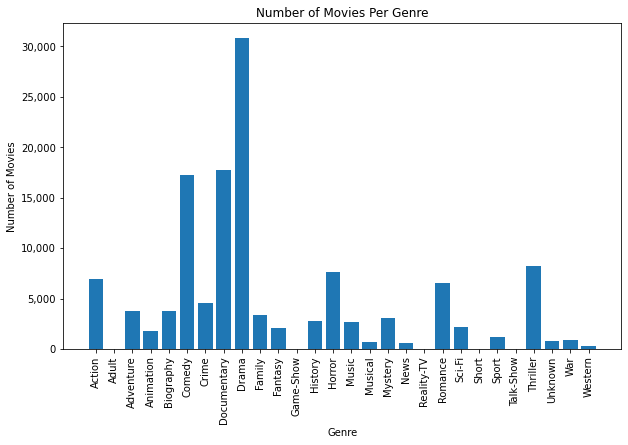

In [40]:
# importing ticker to format axes
import matplotlib.ticker as ticker

plt.figure(figsize = (10, 6))
plt.bar(genre_sum_dict.keys(), genre_sum_dict.values())

# using this line to format the yaxis with commas
# note that I imported matplotlib.ticker as ticker at the top of the notebook
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# using this line to rotate the xaxis for legibility
plt.xticks(rotation=90)

plt.title('Number of Movies Per Genre')
plt.ylabel("Number of Movies")
plt.xlabel("Genre")

plt.show()

This chart is nice and all... but it doesn't really tell me anything except how many movies are made per genre. So what? Would be more interesting to do an analysis based on some metric my stakeholders might care about - like popularity. So let's do that!

In [41]:
# first, narrowing movies with enough votes - 
# I'm setting this threshold at 15
imdb_ev = imdb_ratings.loc[imdb_ratings['numvotes'] >= 15]

In [42]:
imdb_ev.describe()

,averagerating,numvotes,start_year,runtime_minutes,Action,Adult,Adventure,Animation,Biography,Comedy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
count,54684.000000,5.468400e+04,54684.000000,50787.000000,54684.000000,54684.000000,54684.000000,54684.000000,54684.000000,54684.000000,...,54684.000000,54684.000000,54684.000000,54684.0,54684.000000,54684.0,54684.000000,54684.000000,54684.000000,54684.000000
mean,6.159535,4.756011e+03,2014.289353,97.716305,0.106302,0.000037,0.056269,0.026278,0.049356,0.260808,...,0.000183,0.100486,0.033044,0.0,0.016476,0.0,0.125393,0.005559,0.012033,0.004133
std,1.433244,3.512314e+04,2.605731,237.645038,0.308226,0.006048,0.230442,0.159963,0.216613,0.439079,...,0.013522,0.300650,0.178754,0.0,0.127300,0.0,0.331167,0.074353,0.109033,0.064155
min,1.000000,1.500000e+01,2010.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,5.300000,3.600000e+01,2012.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,6.300000,1.130000e+02,2014.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,7.100000,5.130000e+02,2017.000000,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

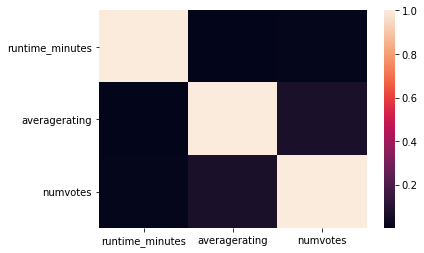

In [43]:
# quick interlude for correlations
sns.heatmap(imdb_ev[['runtime_minutes', 'averagerating', 'numvotes']].corr())

In [45]:
# new trick!
# easiest way to add a new column based on a condition - np.where
# takes 3 arguments: the condition, the value if true, and the value if false
import numpy as np

# here, defining 'popular' movies as those above a 7.5 average rating
imdb_ev['popular'] = np.where(imdb_ev['averagerating'] > 7.5, 1, 0)

<ipython-input-45-786bbcbd432e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_ev['popular'] = np.where(imdb_ev['averagerating'] > 7.5, 1, 0)


In [49]:
# creating a new dictionary for further exploration
more_genre_details = {}

for genre in unique_genres_list:
    # grabbing the movies for the current genre
    genre_df = imdb_ev.loc[imdb_ev[genre] == 1]
    # finding out how many of them are considered popular by my metric above
    genre_pop = genre_df['popular'].sum()
    # then, getting how many are unpopular - the inverse
    genre_unpop = len(genre_df) - genre_pop
    # defining the percentage that are popular
    pop_perc = genre_df['popular'].mean()
    # would be the same as
    # pop_perc = genre_pop / len(genre_df)
    # and then getting the inverse to get the perc of unpopular 
    unpop_perc = 1 - pop_perc
    # saving all this as a dictionary inside a dictionary
    more_genre_details[genre] = {'Popular': genre_pop, 
                                 'Unpopular': genre_unpop, 
                                 'Total': len(genre_df),
                                 'Popular Percentage': pop_perc,
                                 'Unpopular Percentage': unpop_perc}

In [52]:
# what does one of these genres look like now?
more_genre_details['Action']

{'Popular': 556,
 'Unpopular': 5257,
 'Total': 5813,
 'Popular Percentage': 0.09564768622054017,
 'Unpopular Percentage': 0.9043523137794598}

In [54]:
# Creating a dataframe from that dictionary
# Using .T (transpose) so it renders nicer in my opinion
genre_details = pd.DataFrame(more_genre_details).T

In [55]:
genre_details

,Popular,Unpopular,Total,Popular Percentage,Unpopular Percentage
Action,556.0,5257.0,5813.0,0.095648,0.904352
Adult,0.0,2.0,2.0,0.000000,1.000000
Adventure,446.0,2631.0,3077.0,0.144946,0.855054
Animation,209.0,1228.0,1437.0,0.145442,0.854558
Biography,789.0,1910.0,2699.0,0.292330,0.707670
Comedy,1276.0,12986.0,14262.0,0.089469,0.910531
Crime,397.0,3465.0,3862.0,0.102796,0.897204
Documentary,3979.0,6376.0,10355.0,0.384259,0.615741
Drama,3160.0,21095.0,24255.0,0.130282,0.869718
Family,412.0,2198.0,2610.0,0.157854,0.842146


In [56]:
# dropping genres with 10 or fewer movies
too_few = [genre for genre in genre_details.index if genre_details['Total'][genre] <= 10]

genre_details = genre_details.drop(index = too_few)

In [57]:
genre_details

,Popular,Unpopular,Total,Popular Percentage,Unpopular Percentage
Action,556.0,5257.0,5813.0,0.095648,0.904352
Adventure,446.0,2631.0,3077.0,0.144946,0.855054
Animation,209.0,1228.0,1437.0,0.145442,0.854558
Biography,789.0,1910.0,2699.0,0.292330,0.707670
Comedy,1276.0,12986.0,14262.0,0.089469,0.910531
Crime,397.0,3465.0,3862.0,0.102796,0.897204
Documentary,3979.0,6376.0,10355.0,0.384259,0.615741
Drama,3160.0,21095.0,24255.0,0.130282,0.869718
Family,412.0,2198.0,2610.0,0.157854,0.842146
Fantasy,138.0,1560.0,1698.0,0.081272,0.918728


In [58]:
avg_pop_perc = genre_details['Popular Percentage'].mean()
avg_pop_perc

0.1745449576703025

In [63]:
genre_pop_perc = genre_details['Popular Percentage'].sort_values(
    ascending=True).tail(5)

In [64]:
genre_pop_perc

Sport          0.290788
Biography      0.292330
Music          0.336383
Documentary    0.384259
News           0.405405
Name: Popular Percentage, dtype: float64

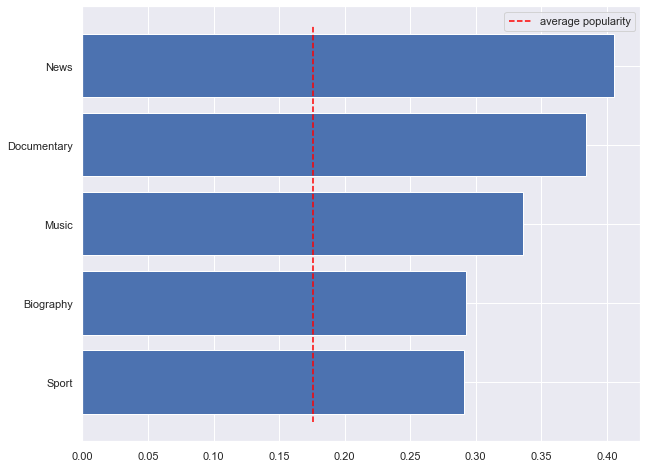

In [72]:
# plotting the top five genres by percentage of popular movies
plt.figure(figsize=(10, 8))

plt.barh(genre_pop_perc.index, genre_pop_perc)

# plotting a line to show the average genre popularity
plt.vlines(x=avg_pop_perc, ymin=-0.5, ymax=4.5, color='red',
           linestyles='dashed', label='average popularity')
plt.legend()

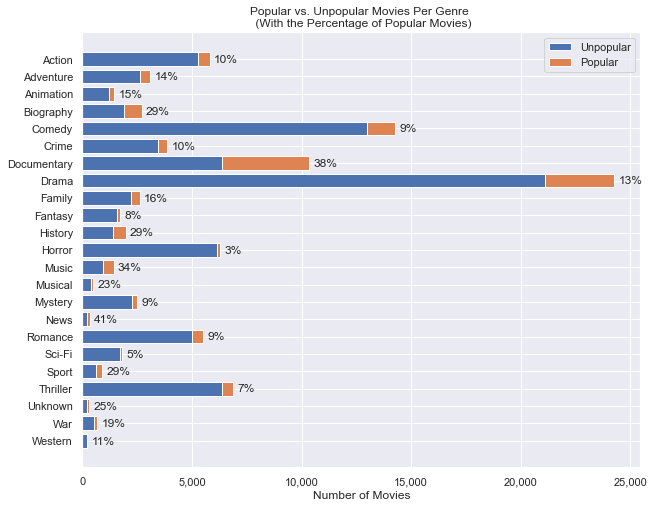

In [94]:
# and now - complicated chart!
plt.figure(figsize=(10, 8))

# stacked horizonal bar charts
plt.barh(genre_details.index, genre_details['Unpopular'], label='Unpopular')
plt.barh(genre_details.index, genre_details['Popular'],
         # here, left shows where the stack of the next part begins
         left=genre_details['Unpopular'], label='Popular')

# grabbing the current axis to format and annotate later
ax = plt.gca()

# inverting y axis so it shows in alphabetical order
ax.invert_yaxis()

# using this line to format the yaxis with commas
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# This tricky bit of code annotates percentages on the chart
y = .2  # our start point on our y axis for the details
# Doing this for each genre
for row in genre_details.index:
    # grabbing the total for that genre
    x = genre_details['Total'][row]
    # grabbing the percentage of popular movies for that genre
    pop_perc = genre_details['Popular Percentage'][row]
    # formatting with f-strings for readability
    percentage = f'{pop_perc * 100:,.0f}%'
    # annotating the chart, locating the annotation at total + 200 and our y height
    ax.annotate(percentage, (x+200, y))
    # adding 1 to our y for the next genre
    y += 1

plt.title("Popular vs. Unpopular Movies Per Genre \n (With the Percentage of Popular Movies)")
plt.xlabel("Number of Movies")
plt.legend()
plt.show()

So what?

Comedies, Documentaries and Dramas have a lot of popular movies, in terms of pure numbers

But News, Documentaries and Music have a lot of popular movies, in terms of percentages